In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!wget https://gitlab.com/eccentric-innovators/kaayar-village-survey/-/raw/master/Data.xlsx

--2020-07-23 12:50:57--  https://gitlab.com/eccentric-innovators/kaayar-village-survey/-/raw/master/Data.xlsx
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25284 (25K) [application/zip]
Saving to: ‘Data.xlsx’

Data.xlsx           100%[===================>]  24.69K  --.-KB/s    in 0.001s  

2020-07-23 12:50:57 (32.5 MB/s) - ‘Data.xlsx’ saved [25284/25284]



In [3]:
%load_ext google.colab.data_table
df = pd.read_excel('Data.xlsx', header = None)
df.drop([0,1,2,9,10,11], axis = 1, inplace=True)
df.drop(list(range(8)), axis = 0, inplace = True)
df.reset_index(inplace = True)
df.columns = ['S.No.', 'Name', 'age', 'Training', 'Support', 'Maintenance', 'Price']
df

S.No.              Name age Training Support Maintenance Price
0        8         Thangaraj  30        4       4           4     4
1        9           Andrews  63        1       2           2     3
2       10     P.M. Krishnan  48        3       4           4     4
3       11     Suryaprakasam  20        4       4           4     4
4       12  Ganapathy Naickr  53        1       2           2     3
..     ...               ...  ..      ...     ...         ...   ...
306    314         Pushpa. B  53        1       2           2     3
307    315         Suresh. V  29        4       3           3     4
308    316  Radhakrishnan. P  45        4       3           3     4
309    317    Arunachalam. R  80        1       2           2     3
310    318   Kirubanandan. A  34        4       3           3     4

[311 rows x 7 columns]

In [4]:
data = df.iloc[:, 2:]
data

age Training Support Maintenance Price
0    30        4       4           4     4
1    63        1       2           2     3
2    48        3       4           4     4
3    20        4       4           4     4
4    53        1       2           2     3
..   ..      ...     ...         ...   ...
306  53        1       2           2     3
307  29        4       3           3     4
308  45        4       3           3     4
309  80        1       2           2     3
310  34        4       3           3     4

[311 rows x 5 columns]

In [5]:
data.describe()

age  Training  Support  Maintenance  Price
count   311       311      311          311    311
unique   35         3        3            3      2
top      29         4        3            3      4
freq     35       185      111          111    203

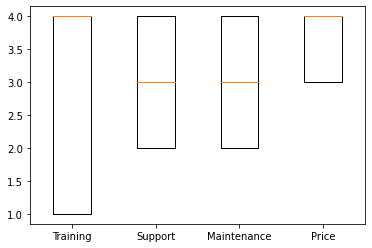

In [6]:
fig, ax = plt.subplots()
ax.boxplot(data.values[:,1:])
ax.set_xticklabels(data.columns[1:])
plt.show()

In [7]:
stats = pd.DataFrame([data.mean(), data.median(), data.mode().T[0], data.max(), data.min(), data.max()-data.min()])
stats.index = ['Mean', 'Median', 'Mode', 'Max', 'Min', 'Range']
params = ['Training', 'Support', 'Maintenance', 'Price']
stats

age  Training   Support  Maintenance     Price
Mean    44.022508  2.938907  2.987138     2.987138  3.652733
Median  45.000000  4.000000  3.000000     3.000000  4.000000
Mode    29.000000  4.000000  3.000000     3.000000  4.000000
Max     80.000000  4.000000  4.000000     4.000000  4.000000
Min     20.000000  1.000000  2.000000     2.000000  3.000000
Range   60.000000  3.000000  2.000000     2.000000  1.000000

In [8]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height, 1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

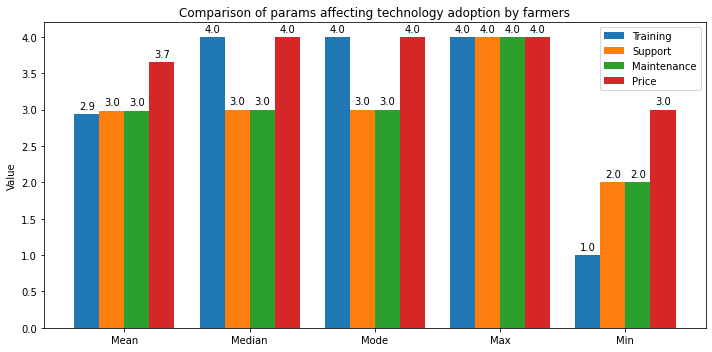

In [9]:
labels = stats.index[:-1]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 5))
dx = [-3*width/2, -width/2, width/2, 3*width/2]
for idx, param in enumerate(params):
  rect = ax.bar(x+dx[idx], stats[param][:-1], width, label = param)
  autolabel(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Comparison of params affecting technology adoption by farmers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig('Comparison of params affecting technology adoption by farmers')

plt.show()

In [10]:
age_groups = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

class_table = pd.DataFrame(np.array(age_groups).reshape((6,1)), index = np.arange(6), columns = ['age group'])
for param in params:
  class_table[param+'_avg'] = [data[param][np.isin(data['age'], list(range(i, i+10)))].mean() for i in range(20, 70, 10)] + [data[param][np.isin(data['age'], list(range(70, 81)))].mean()]
  class_table[param+'_median'] = [data[param][np.isin(data['age'], list(range(i, i+10)))].median() for i in range(20, 70, 10)] + [data[param][np.isin(data['age'], list(range(70, 81)))].median()]
  class_table[param+'_mode'] = [data[param][np.isin(data['age'], list(range(i, i+10)))].mode()[0] for i in range(20, 70, 10)] + [data[param][np.isin(data['age'], list(range(70, 81)))].mode()[0]]
class_table

age group  Training_avg  Training_median  ...  Price_avg  Price_median  Price_mode
0     20-29      4.000000              4.0  ...   4.000000           4.0           4
1     30-39      4.000000              4.0  ...   4.000000           4.0           4
2     40-49      3.419753              4.0  ...   3.876543           4.0           4
3     50-59      1.810811              1.0  ...   3.162162           3.0           3
4     60-69      1.148148              1.0  ...   3.055556           3.0           3
5     70-80      1.000000              1.0  ...   3.000000           3.0           3

[6 rows x 13 columns]

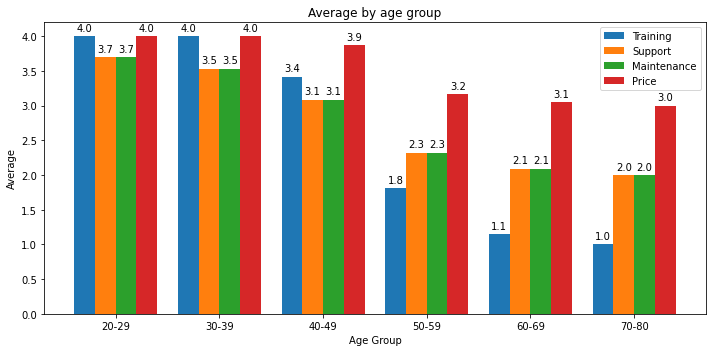

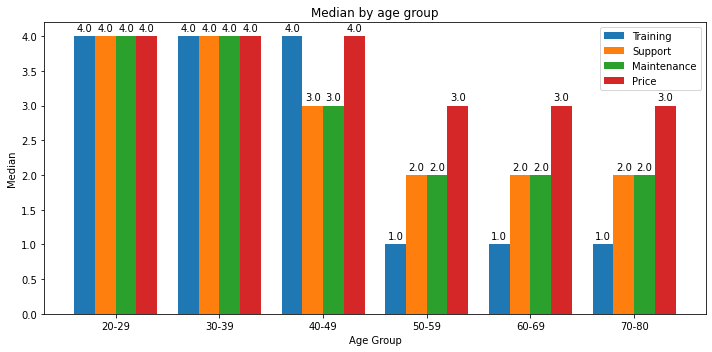

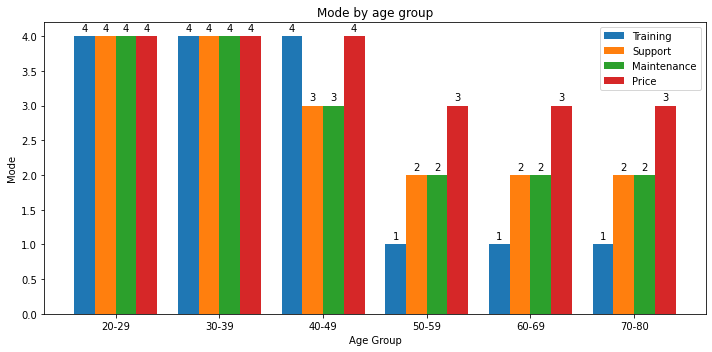

In [11]:
x = np.arange(len(age_groups))  # the label locations
width = 0.2  # the width of the bars

graphs = {'Average': '_avg', 'Median': '_median', 'Mode': '_mode'}

for name, grph in graphs.items():
  fig, ax = plt.subplots(figsize = (10, 5))
  dx = [-3*width/2, -width/2, width/2, 3*width/2]
  for idx, param in enumerate(params):
    rect = ax.bar(x+dx[idx], class_table[param+grph], width, label = param)
    autolabel(rect)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(name)
  ax.set_xlabel('Age Group')
  ax.set_title(name + ' by age group')
  ax.set_xticks(x)
  ax.set_xticklabels(age_groups)
  ax.legend()

  fig.tight_layout()

  plt.savefig(name + ' by age group')

  plt.show()